### Kaggle Link
https://www.kaggle.com/c/digit-recognizer

### Data Introduction

The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn import preprocessing

%matplotlib inline

### Loading and Pre-Processing Data

In [2]:
train_df = pd.read_csv("../Data/Kaggle/mnist-train.csv")
valid_df = pd.read_csv("../Data/Kaggle/mnist-test.csv")

X_train = train_df.drop(['label'], axis=1).values.astype('float32')
y_train = train_df['label'].values
X_valid = valid_df.values.astype('float32')

del train_df
del valid_df

scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

img_rows = 28
img_cols = 28
n_targets = 10

input_shape = (img_rows, img_cols, 1)

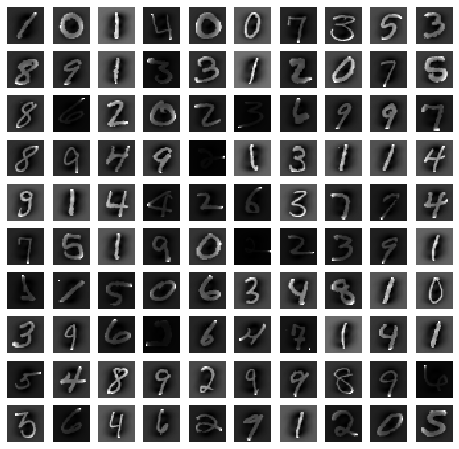

In [3]:
# The data that we are interested in is made of 28x28 images of digits, let's
# have a look at the first images, stored in X_train. For these
# images, we know which digit they represent: it is given by the correspondent y_train.
images_and_labels = list(zip(X_train, y_train))

f, axes = plt.subplots(10, 10, figsize=(8, 8))
for index, (image, label) in enumerate(images_and_labels[:100]):
    axes[int(index/10)][int(index%10)].imshow(image.reshape(img_rows, img_cols), cmap='gray', interpolation='nearest')
    axes[int(index/10)][int(index%10)].set_xticks(np.array([]))
    axes[int(index/10)][int(index%10)].set_yticks(np.array([]))

### Visualization

In [4]:
def plot_history(history):
    # list all data in history
    print(history.history.keys())
    # summarize history for accuracy
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')
    plt.show()
    # summarize history for loss
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['train', 'test'], loc='best')

### Convolutional Neural Networks

In [5]:
import os

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from keras.layers.normalization import BatchNormalization
from keras import optimizers

Using TensorFlow backend.


In [6]:
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols, 1)

In [7]:
# The y_train is not split into 10 distinct class labels, but rather 
# are represented as a single array with the class values
y_train = to_categorical(y_train)

In [8]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(6, 6), input_shape=input_shape, padding='valid', name='conv1'))
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Conv2D(64, kernel_size=(6, 6), activation='relu', padding='valid', name='conv2'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(BatchNormalization())
model.add(Dense(n_targets, activation='softmax', name='preds'))

In [9]:
sgd = optimizers.SGD(lr=0.1)
model.compile(optimizer=sgd, loss='categorical_crossentropy',  metrics=['accuracy'])
hist = model.fit(X_train, y_train, batch_size=32, epochs=10, verbose=2, validation_split=0.33)

Train on 28139 samples, validate on 13861 samples
Epoch 1/10
24s - loss: 0.1826 - acc: 0.9458 - val_loss: 0.0790 - val_acc: 0.9763
Epoch 2/10
21s - loss: 0.0693 - acc: 0.9788 - val_loss: 0.0582 - val_acc: 0.9819
Epoch 3/10
21s - loss: 0.0539 - acc: 0.9835 - val_loss: 0.0444 - val_acc: 0.9875
Epoch 4/10
21s - loss: 0.0424 - acc: 0.9867 - val_loss: 0.0438 - val_acc: 0.9873
Epoch 5/10
21s - loss: 0.0334 - acc: 0.9897 - val_loss: 0.0460 - val_acc: 0.9861
Epoch 6/10
21s - loss: 0.0256 - acc: 0.9922 - val_loss: 0.0322 - val_acc: 0.9898
Epoch 7/10
21s - loss: 0.0257 - acc: 0.9921 - val_loss: 0.0363 - val_acc: 0.9891
Epoch 8/10
21s - loss: 0.0225 - acc: 0.9929 - val_loss: 0.0386 - val_acc: 0.9893
Epoch 9/10
21s - loss: 0.0206 - acc: 0.9935 - val_loss: 0.0354 - val_acc: 0.9905
Epoch 10/10
21s - loss: 0.0179 - acc: 0.9940 - val_loss: 0.0332 - val_acc: 0.9902


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


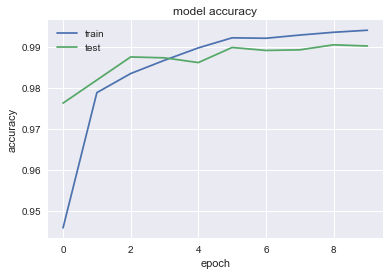

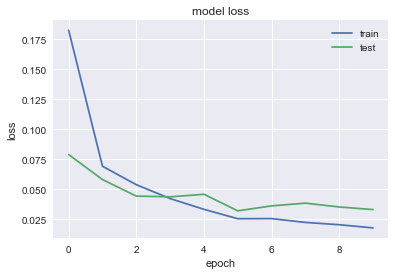

In [10]:
plot_history(hist)

In [11]:
pred = model.predict_classes(X_valid)

np.savetxt('mnist-output.csv', np.c_[range(1,len(pred)+1),pred], delimiter=',', header = 'ImageId,Label', comments = '', fmt='%d')

27968/28000 [============================>.] - ETA: 0s

### Layers Visualization

In [12]:
from vis.visualization import visualize_activation
from vis.utils import utils
from vis.input_modifiers import Jitter

from keras import activations

#### Dense Layer Activation

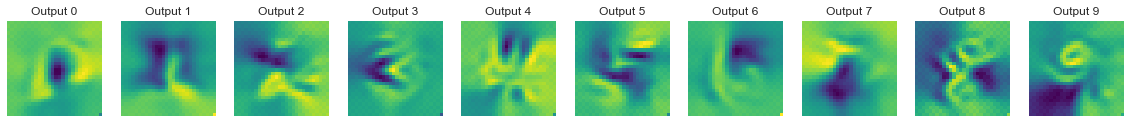

In [14]:
layer_idx = utils.find_layer_idx(model, 'preds')

model.layers[layer_idx].activation = activations.linear
model = utils.apply_modifications(model)

f, axes = plt.subplots(1, 10, figsize=(20, 5))
for output_idx in range(10):
    img = visualize_activation(model, layer_idx, filter_indices=output_idx, input_range=(0., 1.))
    axes[output_idx].imshow(img[..., 0], cmap='viridis')
    axes[output_idx].set_xticks(np.array([]))
    axes[output_idx].set_yticks(np.array([]))
    axes[output_idx].set_title('Output {}'.format(output_idx))

#### Convolutional Layers

In [15]:
from vis.visualization import get_num_filters

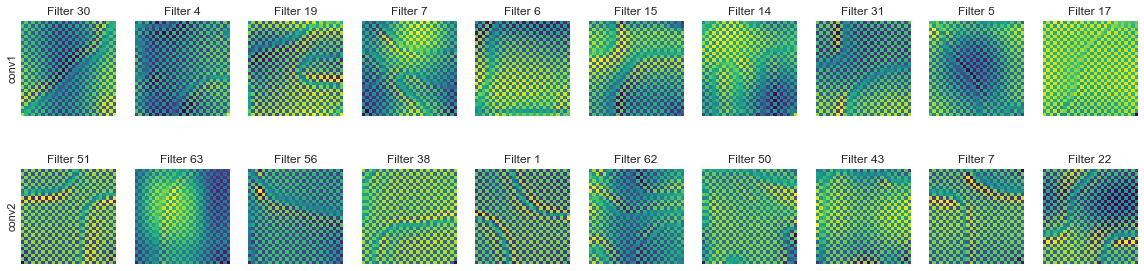

In [18]:
n_filters = 10
conv_layers = ['conv1', 'conv2']
f, axes = plt.subplots(len(conv_layers), n_filters, figsize=(20, 5))

for i, layer_name in enumerate(conv_layers):
    layer_idx = utils.find_layer_idx(model, layer_name)
    # Visualize random filters in this layer.
    filters = np.random.permutation(get_num_filters(model.layers[layer_idx]))[:n_filters]
    # Generate input image for each filter.
    for j, idx in enumerate(filters):
        img = visualize_activation(model, layer_idx, filter_indices=idx, input_modifiers=[Jitter(0.05)])
        axes[i][j].imshow(img[..., 0], cmap='viridis')
        axes[i][j].set_xticks(np.array([]))
        axes[i][j].set_yticks(np.array([]))
        axes[i][j].set_title('Filter {}'.format(idx))

for i, row in enumerate(axes):
    for j, cell in enumerate(row):
        if j == 0:
            cell.set_ylabel(conv_layers[i])